## Feature Scaling

The attributes have very different scales. It is difficult to compare them and see which of them have the lowest variance. Let's scale them.

The two common approaches to bringing different features onto the same scale are normalization and standardization. Normalization concept is implemented in Python using MinMaxScaler and the standardization concept is implemented using StandardScaler.

Normalization refers to the rescaling of the features to a range of [0, 1], which is a special case of min-max scaling. **Normalization is useful when the data is needed in the bounded intervals.**

The standardization technique is used to center the feature columns at mean 0 with a standard deviation of 1 so that the feature columns have the same parameters as a standard normal distribution. Unlike Normalization, **standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling, which scales the data to a limited range of values**.

### When to use MinMaxScaler or StandardScaler? 
MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian. For example, in image processing, pixel values are typically in the range of 0-255. Scaling these values using MinMaxScaler ensures that the values are within a fixed range and contributes equally to the analysis. Similarly, when dealing with non-Gaussian distributions such as a power-law distribution, MinMaxScaler can be used to ensure that the range of values is scaled between 0 and 1.

StandardScaler is useful when the data has a Gaussian distribution or when the algorithm requires standardized features. For example, in linear regression, the features need to be standardized to ensure that they contribute equally to the analysis. Similarly, when working with clustering algorithms such as KMeans, StandardScaler can be used to ensure that the features are standardized and contribute equally to the analysis.

In [21]:
# LIBRARIES

import numpy as np
import pandas as pd

from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [22]:
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [23]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


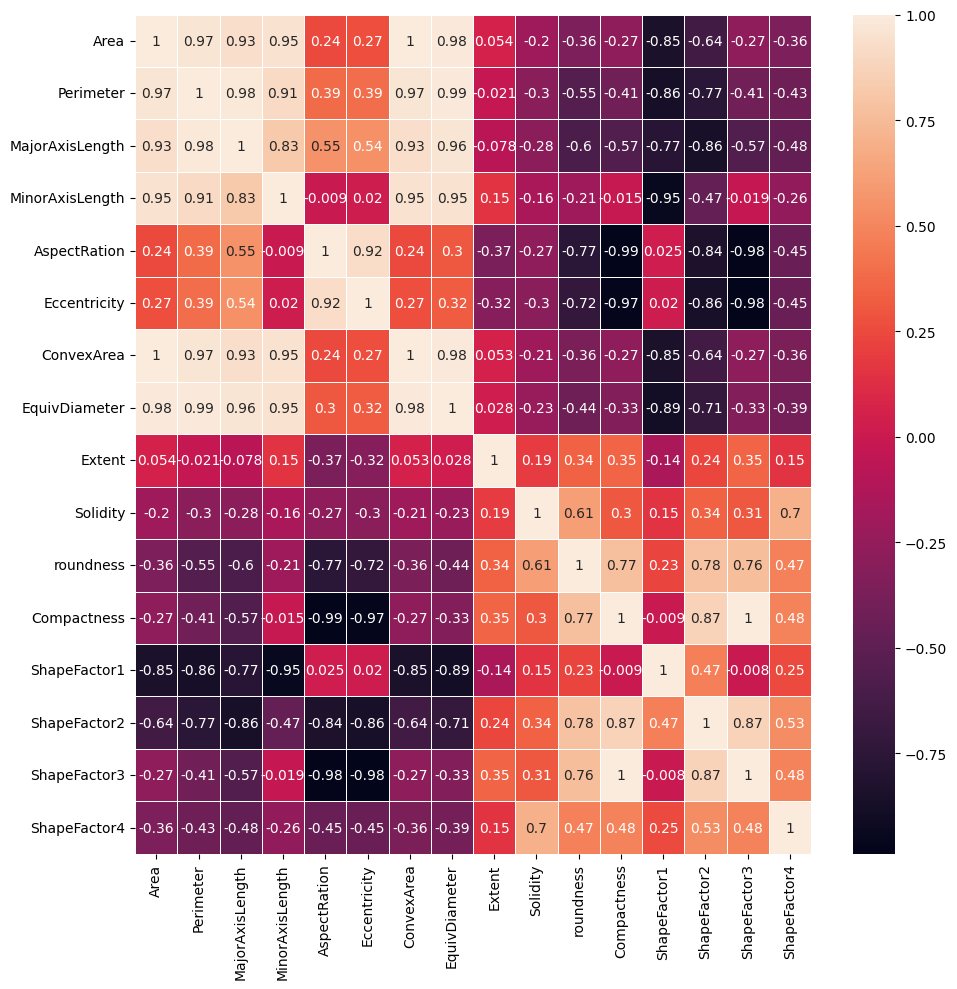

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
fig.tight_layout()

It seems that the attributes are all real-valued and positive.

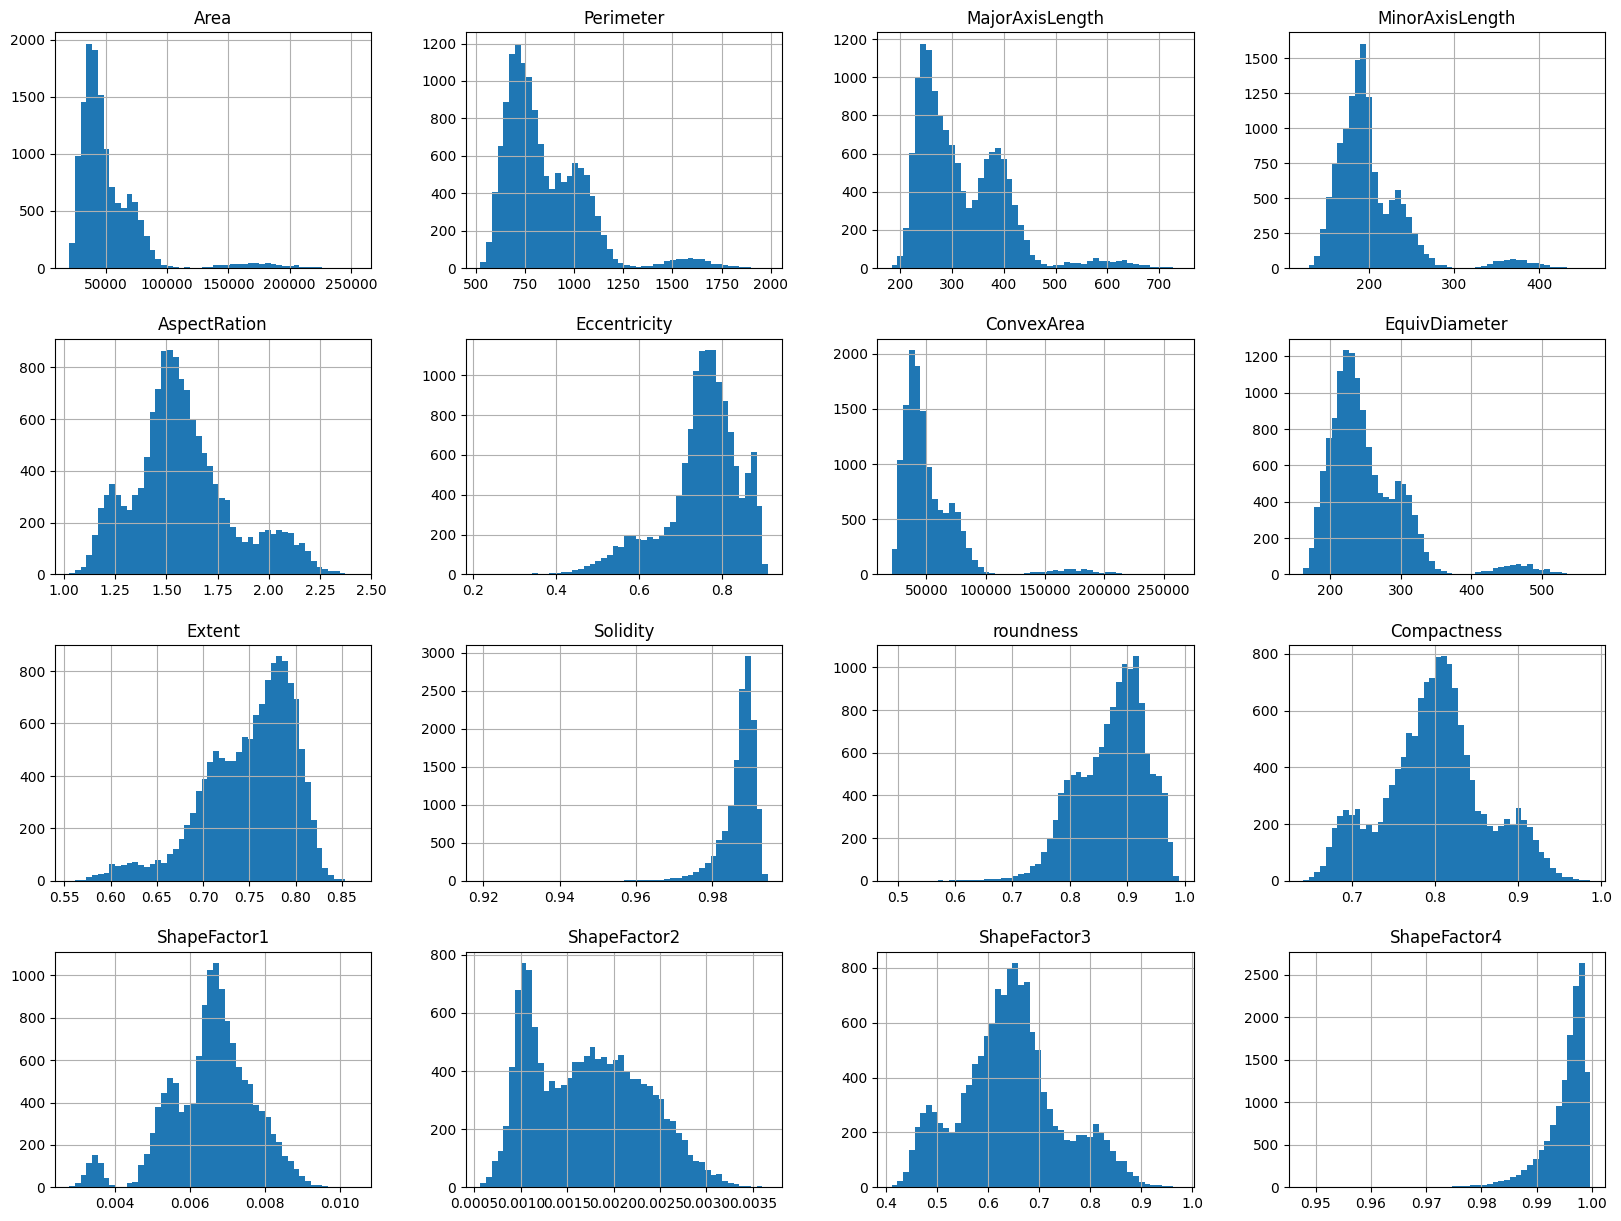

In [27]:
df.hist(figsize=(20,15), bins=50);

In [28]:
from sklearn.preprocessing import MinMaxScaler
 
df_minmax = df.copy()
 
mmscaler = MinMaxScaler()
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 
            'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4']

df_minmax[features] = mmscaler.fit_transform(df_minmax[features])

In [29]:
df_minmax.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,0.139320,0.226304,0.245905,0.236190,0.397295,0.768181,0.136386,0.224978,0.625380,0.900112,0.765693,0.459403,0.493356,0.371445,0.413253,0.910285
std,0.125212,0.146710,0.154332,0.133171,0.175517,0.132860,0.122744,0.144996,0.157895,0.061783,0.118786,0.177989,0.147006,0.192168,0.175392,0.083898
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067926,0.122404,0.125531,0.157944,0.289902,0.717685,0.066084,0.131880,0.525344,0.880592,0.683497,0.351551,0.406861,0.190064,0.302997,0.884146
50%,0.103469,0.184992,0.204017,0.207054,0.374443,0.787743,0.100974,0.189141,0.657953,0.915228,0.785402,0.463478,0.503986,0.364216,0.410514,0.935698
75%,0.174691,0.309781,0.347394,0.279902,0.485429,0.854208,0.171533,0.289620,0.744779,0.938164,0.852681,0.558634,0.585601,0.517962,0.506118,0.964454
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


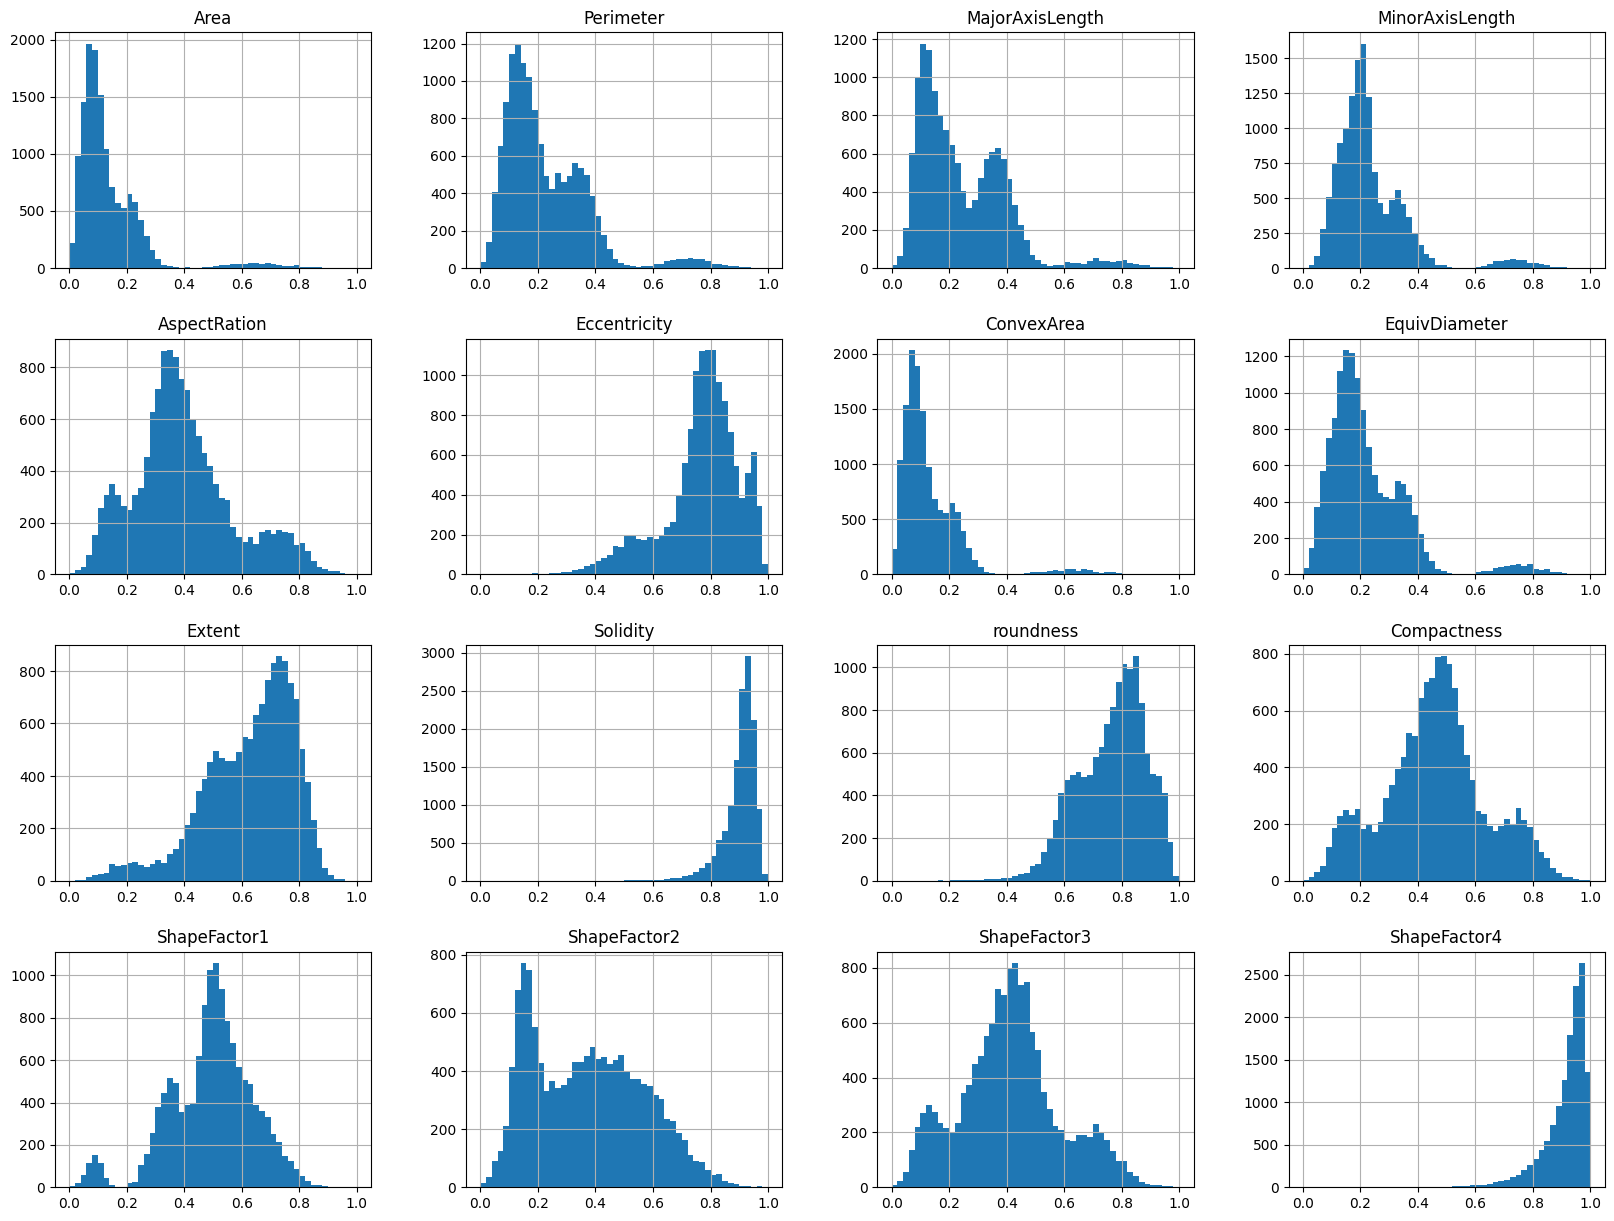

In [30]:
df_minmax.hist(figsize=(20,15), bins=50);

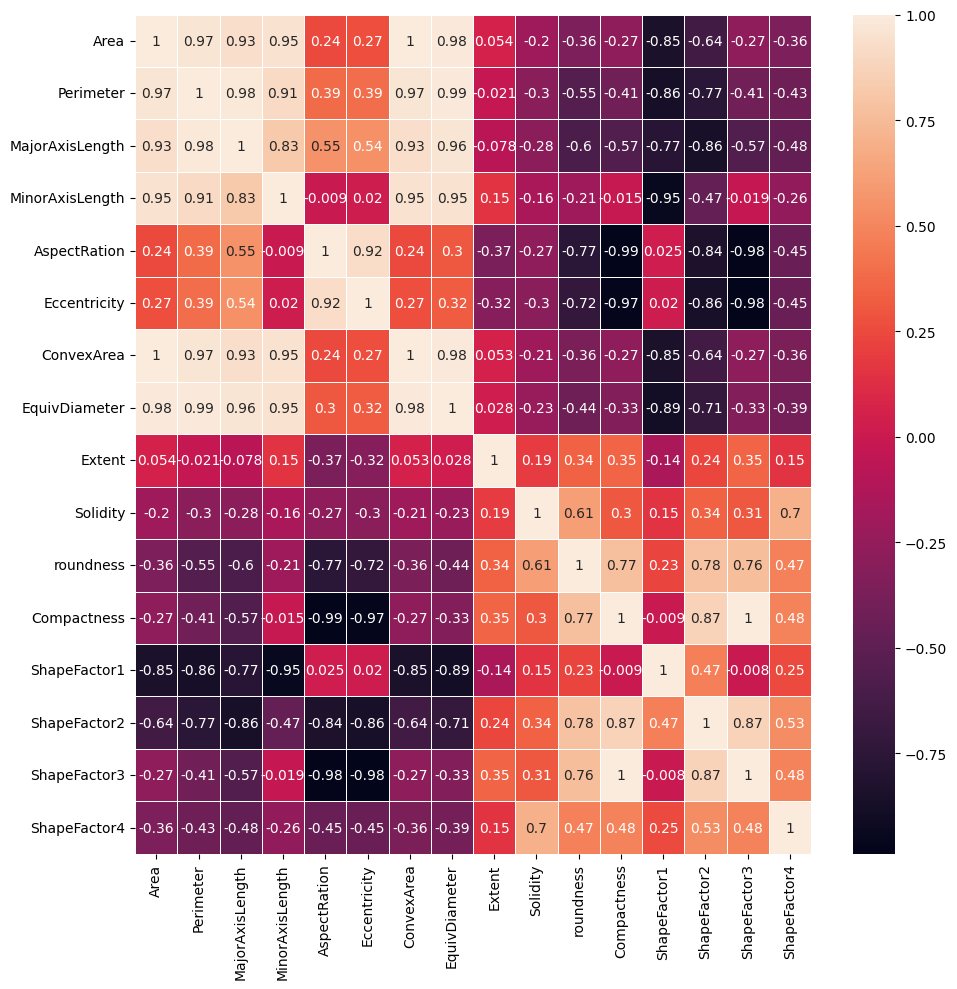

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_minmax.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
fig.tight_layout()

In [32]:
from sklearn.preprocessing import StandardScaler

df_standard = df.copy()

sc = StandardScaler()
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 
            'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2','ShapeFactor3', 'ShapeFactor4']
  
df_standard[features] = sc.fit_transform(df_standard[features])

In [33]:
df_standard.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04
mean,3.341028e-17,-1.002308e-16,-1.336411e-16,3.675131e-16,-4.343337e-16,-2.276075e-16,1.002308e-16,-1.336411e-16,-1.992088e-15,-2.298627e-14,3.341028e-17,-1.670514e-17,-1.670514e-16,1.336411e-16,7.517313e-17,1.966195e-14
std,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.112719e+00,-1.542583e+00,-1.593407e+00,-1.773645e+00,-2.263655e+00,-5.782098e+00,-1.111184e+00,-1.551678e+00,-3.960880e+00,-1.456945e+01,-6.446210e+00,-2.581167e+00,-3.356153e+00,-1.932991e+00,-2.356255e+00,-1.085036e+01
25%,-5.702102e-01,-7.082260e-01,-7.799910e-01,-5.875797e-01,-6.118921e-01,-3.800848e-01,-5.727750e-01,-6.420997e-01,-6.335853e-01,-3.159613e-01,-6.919874e-01,-6.059668e-01,-5.884012e-01,-9.439025e-01,-6.286495e-01,-3.115721e-01
50%,-2.863377e-01,-2.816033e-01,-2.714228e-01,-2.187975e-01,-1.302079e-01,1.472404e-01,-2.885152e-01,-2.471687e-01,2.063003e-01,2.446575e-01,1.659247e-01,2.289701e-02,7.231301e-02,-3.762062e-02,-1.561590e-02,3.029170e-01
75%,2.824987e-01,5.690149e-01,6.576317e-01,3.282530e-01,5.021578e-01,6.475228e-01,2.863522e-01,4.458347e-01,7.562196e-01,6.159095e-01,7.323368e-01,5.575363e-01,6.275166e-01,7.624716e-01,5.294956e-01,6.456801e-01
max,6.874044e+00,5.273833e+00,4.886372e+00,5.735751e+00,3.434007e+00,1.744901e+00,7.036141e+00,5.345339e+00,2.372678e+00,1.616807e+00,1.972582e+00,3.037363e+00,3.446551e+00,3.270983e+00,3.345475e+00,1.069377e+00


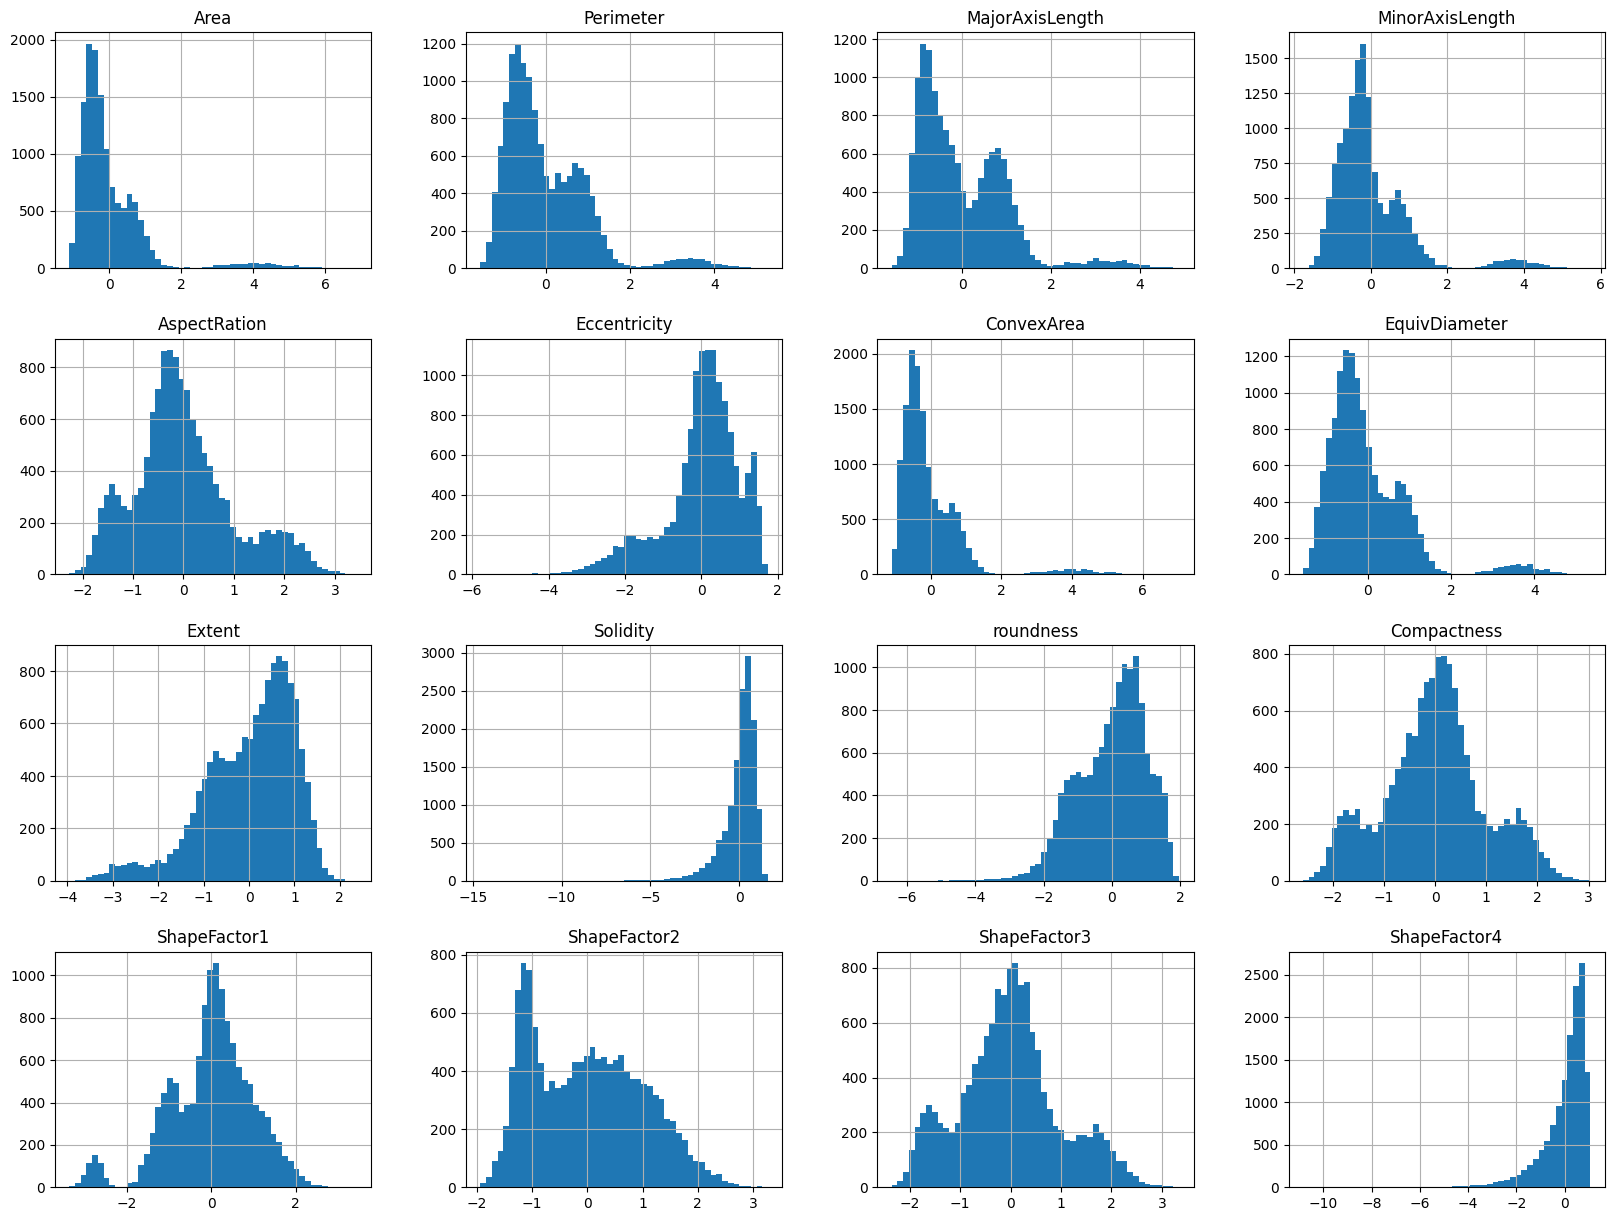

In [35]:
df_standard.hist(figsize=(20,15), bins=50);

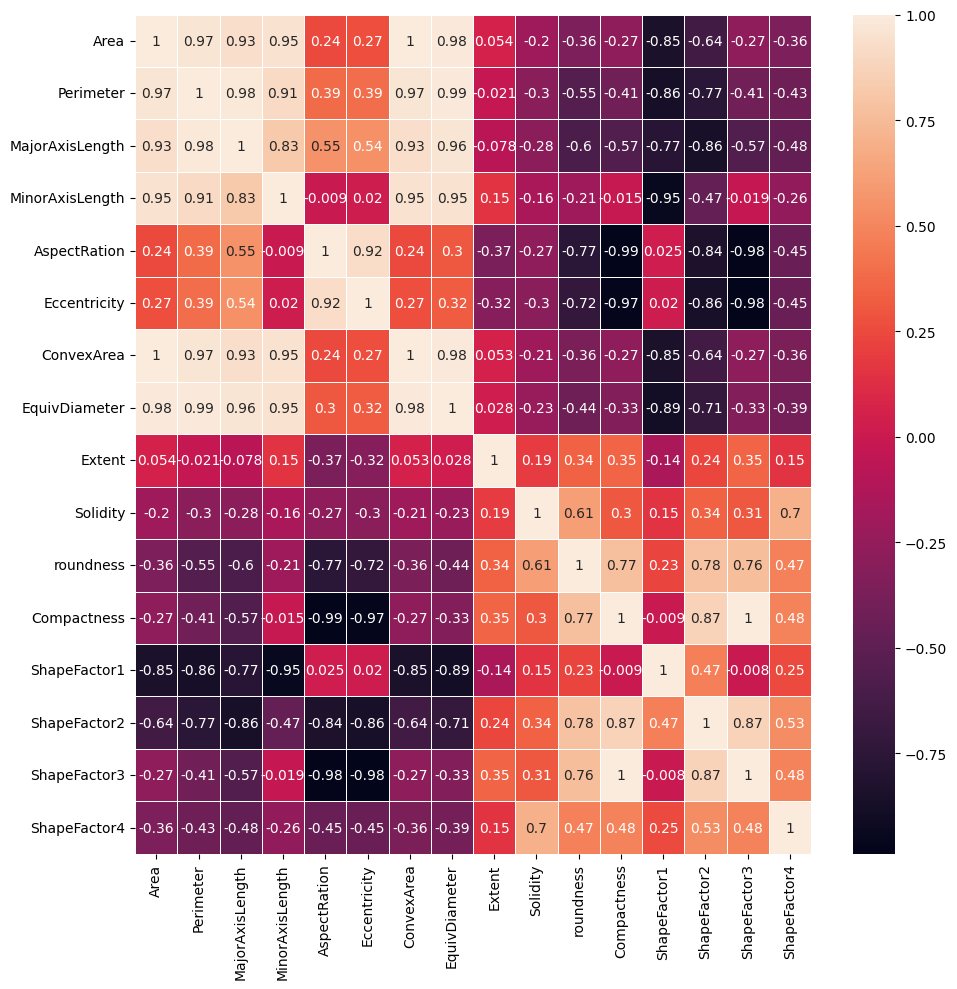

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df_standard.corr(numeric_only=True).round(3), annot=True, linewidths=.5, ax=ax);
fig.tight_layout()